# Phase 1 : 24-08-2025 13:13:04

Building and testing basic AES, DES Encryption

In [26]:
# @title 🧰 Setup and Installation for Phase 1

!pip install pycryptodome

In [27]:
# @title 🔐 AES and DES Encryption and Decryption Module Creation

from Crypto.Cipher import AES, DES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

def aes_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(plaintext.encode(), AES.block_size))
    return cipher.iv + ct_bytes

def aes_decrypt(ciphertext, key):
    iv = ciphertext[:16]
    ct = ciphertext[16:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct), AES.block_size)
    return pt.decode()

def des_encrypt(plaintext, key):
    cipher = DES.new(key, DES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(plaintext.encode(), DES.block_size))
    return cipher.iv + ct_bytes

def des_decrypt(ciphertext, key):
    iv = ciphertext[:8]
    ct = ciphertext[8:]
    cipher = DES.new(key, DES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct), DES.block_size)
    return pt.decode()

def encrypt_with_algo(plaintext, key, algorithm='AES'):
    if algorithm == 'AES':
        return aes_encrypt(plaintext, key)
    elif algorithm == 'DES':
        return des_encrypt(plaintext, key)
    else:
        raise ValueError("Unsupported algorithm")

def decrypt_with_algo(ciphertext, key, algorithm='AES'):
    if algorithm == 'AES':
        return aes_decrypt(ciphertext, key)
    elif algorithm == 'DES':
        return des_decrypt(ciphertext, key)
    else:
        raise ValueError("Unsupported algorithm")

In [28]:
# @title Testing Phase 1

# pt = input("Enter a text for encryption : ")
# key = get_random_bytes(16)
# ct_aes = encrypt_with_algo(pt, key, 'AES')
# print("AES Encryption : ", ct_aes.hex())
# print("AES Decryption : ", decrypt_with_algo(ct_aes, key, 'AES'))

# key = get_random_bytes(8)
# ct_des = encrypt_with_algo(pt, key, 'DES')
# print("DES Encryption : ", ct_des.hex())
# print("DES Decryption : ", decrypt_with_algo(ct_des, key, 'DES'))

# Phase 2 : 24-08-2025 14:21:24

Building and testing Quantum Key using QRNG

In [29]:
# @title 🧰 Setup and Installation for Phase 2

!pip install qiskit qiskit-aer --quiet

In [30]:
# @title 🔑 Generate Random Quantum Key

from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
import numpy as np

def generate_quantum_key(bits=128):
    qc = QuantumCircuit(bits, bits)
    qc.h(range(bits))
    qc.measure(range(bits), range(bits))

    # Use Aer Sampler to simulate and get outcome
    sampler = Sampler()
    result = sampler.run(qc).result()
    counts = result.quasi_dists[0]

    # Get the most probable bitstring
    max_key = max(counts, key=counts.get)
    bit_str = bin(max_key)[2:]

    # Pad with leading zeros if necessary
    if len(bit_str) < bits:
        bit_str = '0' * (bits - len(bit_str)) + bit_str

    # Convert to byte key
    key_bytes = bytes(int(bit_str[i:i+8], 2) for i in range(0, bits, 8))
    return key_bytes

In [31]:
# @title 🧪 Test

aes_key = generate_quantum_key(128)
des_key = generate_quantum_key(64)
# print("Quantum AES Key:", key.hex(), "| Length:", len(key))

/tmp/ipython-input-3945919019.py:3: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  aes_key = generate_quantum_key(128)
/tmp/ipython-input-3945919019.py:4: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  des_key = generate_quantum_key(64)


In [32]:
# @title ✅ Using Generated keys for AES and DES

plaintext = "I am unstoppable"

aes_ct = aes_encrypt(plaintext, aes_key)
print("AES Key :", aes_key.hex())
print("AES Encrypted :", aes_ct.hex())
print("AES Decrypted :", aes_decrypt(aes_ct, aes_key))

des_ct = des_encrypt(plaintext, des_key)
print("dES Key :", des_key.hex())
print("dES Encrypted :", des_ct.hex())
print("dES Decrypted :", des_decrypt(des_ct, des_key))

AES Key : 1ed054bea2f82f1ff9d0f8c36f40c5bf
AES Encrypted : ba3fc350eef2d9c6c701598ab3dd57ca465ac66c468ec0d04dabc58a8085af5b6a942946ce67aa48638cf1e850c2090a
AES Decrypted : I am unstoppable
dES Key : f74dce2716f0f1f8
dES Encrypted : 9c1ea7af571bc9bff6f4e56ae3875d1dbfa60dc6900f4ea4ea589745d8e67aa8
dES Decrypted : I am unstoppable


# Phase 3 : 24-08-2025 14:47:11

Simulating BB84 protocol for secure key agreement

In [33]:
# @title Basic 🅱️🅱️𝟾𝟺 Code

import numpy as np

def random_bitstring(length):
    return np.random.randint(2, size=length)

def random_bases(length):
    return np.random.randint(2, size=length)

def encode_qubits(bits, bases):
    encoded = []
    for bit, basis in zip(bits, bases):
        qc = QuantumCircuit(1, 1)
        if bit == 1:
            qc.x(0)
        if basis == 1:
            qc.h(0)
        encoded.append(qc)
    return encoded

In [34]:
# @title ↔️ Transmission attempt

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

def measure_qubits(qubits, bases, eve_present=False):
    backend = AerSimulator()
    measurements = []

    for i, qc in enumerate(qubits):
        circuit = qc.copy()

        if eve_present:
            eve_basis = np.random.randint(2)
            if eve_basis == 1:
                circuit.h(0)
            circuit.measure(0, 0)

            transpiled = transpile(circuit, backend)
            result = backend.run(transpiled, shots=1, memory=True).result()
            intercepted_bit = int(result.get_memory()[0])

            circuit = QuantumCircuit(1, 1)
            if intercepted_bit == 1:
                circuit.x(0)
            if bases[i] == 1:
                circuit.h(0)

        if bases[i] == 1:
            circuit.h(0)
        circuit.measure(0, 0)

        transpiled = transpile(circuit, backend)
        result = backend.run(transpiled, shots=1, memory=True).result()
        bit = int(result.get_memory()[0])
        measurements.append(bit)

    return measurements

In [35]:
# @title Key Sifting and Comparison

def sift_keys(alice_bits, alice_bases, bob_bits, bob_bases):
    sifted_alice = []
    sifted_bob = []
    for i in range(len(alice_bits)):
        if alice_bases[i] == bob_bases[i]:
            sifted_alice.append(alice_bits[i])
            sifted_bob.append(bob_bits[i])

    return [int(x) for x in sifted_alice], sifted_bob

In [36]:
# @title 🎓 Full Demo

def demo(eve = False, n_bits=256, min_key_len=10):
    alice_bits = random_bitstring(n_bits)
    alice_bases = random_bases(n_bits)
    bob_bases = random_bases(n_bits)

    qubits = encode_qubits(alice_bits, alice_bases)

    bob_bits = measure_qubits(qubits, bob_bases, eve)

    alice_key, bob_key = sift_keys(alice_bits, alice_bases, bob_bits, bob_bases)

    # print("Alice Key:", alice_key)
    # print("Bob Key:  ", bob_key)

    key_len = len(alice_key)

    if key_len < min_key_len:
        # signal caller to retry this trial (too little data to judge)
        return None  # meaning "skip"

    error_bits = sum(a != b for a, b in zip(alice_key, bob_key))
    error_rate = error_bits / key_len

    # print(f"\nKey Length: {len(alice_key)}")
    # print(f"Error Rate: {error_rate:.2%} {'❌ (Eve detected)' if error_rate > 0.25 else '✅ (Secure)'}")

    return error_rate

In [37]:
# @title 📝 Repeated testing with threshold + retries

# import random

# trials = int(input("Enter number of trials : "))
# n_bits = 100                 # more stable than 50
# threshold = 0.15             # 0.25 theoretical; margin for finite-sample noise
# min_key_len = 10
# max_retries_per_trial = 3    # in case sifted key is too short

# true_eve = false_eve = false_not_eve = true_not_eve = 0
# skipped = 0

# for i in range(trials):
#     # Try to get a usable trial (enough sifted bits)
#     print("Starting ", i)
#     for attempt in range(max_retries_per_trial):
#         eve = random.choice([True, False])
#         error_rate = demo(eve=eve, n_bits=n_bits, min_key_len=min_key_len)
#         if error_rate is not None:
#             break
#     else:
#         skipped += 1
#         print("Trying ", i, " ", attempt, " time.")
#         continue  # couldn’t get a usable key; skip this trial

#     detected = (error_rate >= threshold)

#     if eve and detected:
#         true_eve += 1
#     elif eve and not detected:
#         false_eve += 1
#     elif (not eve) and detected:
#         false_not_eve += 1
#     else:
#         true_not_eve += 1

# print("Eve present & correctly flagged (TP):  ", true_eve)
# print("Eve present & missed (FN):             ", false_eve)
# print("No Eve but flagged (FP):               ", false_not_eve)
# print("No Eve & not flagged (TN):             ", true_not_eve)
# print("Skipped trials (short keys):           ", skipped)

# total = true_eve + false_eve + false_not_eve + true_not_eve
# if total > 0:
#     accuracy = round((true_eve + true_not_eve) / total * 100, 2)
#     print("Correct Identification: ", accuracy, "%")
# else:
#     print("No usable trials (all skipped). Try increasing n_bits or retries.")

# Phase 4 : 24-08-2025 21:14:22

Encryption and Decryption using quantum keys as declared in Phase 3 with AES and DES modules in Phase 1

In [38]:
# @title 😣 BB84 Helpers

def random_bitstring(n):
    return np.random.randint(2, size=n).tolist()

def random_bases(n):      # 0 = Z basis, 1 = X basis
    return np.random.randint(2, size=n).tolist()

def encode_qubits(bits, bases):
    """Build one-qubit circuits per bit with chosen basis."""
    circuits = []
    for bit, basis in zip(bits, bases):
        qc = QuantumCircuit(1, 1)
        if bit == 1:     # prepare |1>
            qc.x(0)
        if basis == 1:   # switch to X basis (|+>, |->)
            qc.h(0)
        circuits.append(qc)
    return circuits

def measure_qubits(qubits, bob_bases, eve_present=False):
    """
    Bob measures each received qubit in his chosen basis.
    Optional Eve: intercepts (random basis), measures, then resends in HER basis,
    which statistically induces ~25% errors after sifting.
    """
    backend = AerSimulator()
    out_bits = []

    for i, prep in enumerate(qubits):
        circuit = prep.copy()

        if eve_present:
            # Eve chooses a random basis and measures
            eve_basis = np.random.randint(2)
            eve_circ = circuit.copy()
            if eve_circ.num_clbits == 0:
                eve_circ.add_register(*QuantumCircuit(1,1).cregs)
            if eve_basis == 1:
                eve_circ.h(0)
            eve_circ.measure(0, 0)
            tr = transpile(eve_circ, backend)
            res = backend.run(tr, shots=1, memory=True).result()
            intercepted = int(res.get_memory()[0])

            # Eve resends in the basis she measured
            circuit = QuantumCircuit(1, 1)
            if intercepted == 1: circuit.x(0)
            if eve_basis == 1:    circuit.h(0)

        # Bob applies his basis and measures
        if circuit.num_clbits == 0:
            circuit.add_register(*QuantumCircuit(1,1).cregs)
        if bob_bases[i] == 1:
            circuit.h(0)
        circuit.measure(0, 0)

        trb = transpile(circuit, backend)
        resb = backend.run(trb, shots=1, memory=True).result()
        bit = int(resb.get_memory()[0])
        out_bits.append(bit)

    return out_bits

def sift_keys(alice_bits, alice_bases, bob_bits, bob_bases):
    """Keep positions where bases match."""
    idx = [i for i in range(len(alice_bits)) if alice_bases[i] == bob_bases[i]]
    a_sift = [alice_bits[i] for i in idx]
    b_sift = [bob_bits[i]  for i in idx]
    return a_sift, b_sift, idx

In [39]:
# @title 🗝️ Short Key Handling

def get_bb84_key(target_bits=128, n_per_round=256, qber_cutoff=0.11,
                 max_rounds=20, eve_present=False, verbose=True):
    """
    Repeats BB84 rounds until we collect at least `target_bits` sifted, low-QBER bits.
    - qber_cutoff ~ 11% is a practical threshold (abort round if higher).
    - If Eve is present (True), rounds will be discarded due to high QBER.
    """
    collected = []
    last_qber = None

    for r in range(1, max_rounds+1):
        # Alice & Bob choose bits/bases
        alice_bits  = random_bitstring(n_per_round)
        alice_bases = random_bases(n_per_round)
        bob_bases   = random_bases(n_per_round)

        # Alice encodes; channel → Bob measures (optionally with Eve)
        qubits  = encode_qubits(alice_bits, alice_bases)
        bob_bits = measure_qubits(qubits, bob_bases, eve_present=eve_present)

        # Sift and compute QBER (exact here; in practice you'd sample)
        a_sift, b_sift, _ = sift_keys(alice_bits, alice_bases, bob_bits, bob_bases)
        if len(a_sift) == 0:
            if verbose: print(f"Round {r}: no matches (unlikely).")
            continue
        errors = sum(int(a != b) for a, b in zip(a_sift, b_sift))
        qber = errors / len(a_sift)
        last_qber = qber

        if verbose:
            print(f"Round {r}: sifted={len(a_sift)} bits, QBER={qber:.2%}")

        if qber > qber_cutoff:
            if verbose: print("  > Discarded: QBER above cutoff.")
            continue   # throw away this round (possible Eve / noisy)

        collected.extend(a_sift)  # a_sift and b_sift match closely if QBER low
        if len(collected) >= target_bits:
            return collected[:target_bits], {"rounds_used": r, "qber_last": last_qber, "sifted_total": len(collected)}

    raise RuntimeError("Insufficient secure bits. Increase n_per_round/max_rounds or relax qber_cutoff.")

In [40]:
# @title 🧑‍🔬 Converting bits to bytes

def bits_to_bytes(bit_list):
    n = len(bit_list) - (len(bit_list) % 8)  # truncate to full bytes
    bit_list = bit_list[:n]
    by = bytes(int(''.join(map(str, bit_list[i:i+8])), 2) for i in range(0, n, 8))
    return by

def get_aes_key_from_bb84(bits=128, **bb84_kwargs):
    bit_list, meta = get_bb84_key(target_bits=bits, **bb84_kwargs)
    key = bits_to_bytes(bit_list)
    if len(key) != bits // 8:
        raise ValueError("Did not produce exact AES key length.")
    return key, meta

def get_des_key_from_bb84(bits=64, **bb84_kwargs):
    bit_list, meta = get_bb84_key(target_bits=bits, **bb84_kwargs)
    key = bits_to_bytes(bit_list)
    if len(key) != bits // 8:
        raise ValueError("Did not produce exact DES key length.")
    return key, meta

In [41]:
# @title 🔐 Encrypt AES and DES using quantum keys

def aes_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct = cipher.encrypt(pad(plaintext.encode(), AES.block_size))
    return cipher.iv + ct

def aes_decrypt(ciphertext, key):
    iv, ct = ciphertext[:16], ciphertext[16:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    return unpad(cipher.decrypt(ct), AES.block_size).decode()

def des_encrypt(plaintext, key):
    cipher = DES.new(key, DES.MODE_CBC)
    ct = cipher.encrypt(pad(plaintext.encode(), DES.block_size))
    return cipher.iv + ct

def des_decrypt(ciphertext, key):
    iv, ct = ciphertext[:8], ciphertext[8:]
    cipher = DES.new(key, DES.MODE_CBC, iv)
    return unpad(cipher.decrypt(ct), DES.block_size).decode()

In [42]:
# @title 🧪 Testing the things

# # Toggle Eve to see keygen fail (or rounds discarded)
# EVE = False   # set True to observe high QBER blocks

# # Generate AES‑128 key via BB84 (will automatically run multiple rounds if needed)
# aes_key, meta_aes = get_aes_key_from_bb84(
#     bits=128, n_per_round=256, qber_cutoff=0.10, max_rounds=20, eve_present=EVE, verbose=True
# )
# print("\nAES key (hex):", aes_key.hex())
# print("Meta:", meta_aes)

# pt = input("Enter a plain text for testing the AES and DES encryption and decryption using Quantum Keys : ")
# ct = aes_encrypt(pt, aes_key)
# rt = aes_decrypt(ct, aes_key)
# print("\nAES plaintext: ", pt)
# print("\nAES key      : ", aes_key.hex())
# print("\nAES Ciphered : ", ct.hex())
# print("\nAES Decrypt  : ", rt)
# print("AES roundtrip ok:", rt == pt)

# # (Optional) DES demo
# des_key, meta_des = get_des_key_from_bb84(
#     bits=64, n_per_round=256, qber_cutoff=0.11, max_rounds=20, eve_present=EVE, verbose=False
# )
# print("\nDES key (hex):", des_key.hex())
# ct2 = des_encrypt(pt, des_key)
# rt2 = des_decrypt(ct2, des_key)
# print("\nDES plaintext: ", pt)
# print("\nDES key      : ", des_key.hex())
# print("\nDES Ciphered : ", ct2.hex())
# print("\nDES Decrypt  : ", rt2)
# print("DES roundtrip ok:", rt2 == pt)

# Phase 5 : 07-09-2025 15:13:07

Implementing Jaya Krishna sir's suggestions.

In [43]:
# @title Some more dependencies

!pip install qiskit qiskit-aer pycryptodome pandas matplotlib --quiet

In [44]:
# @title 🔐 AES-GCM helpers

import os, time, secrets, math
import pandas as pd
import numpy as np
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

NONCE_LEN = 12

def aes_gcm_encrypt(data: bytes, key: bytes):
    """
    Returns nonce(12) || ciphertext || tag(16)
    """
    nonce = get_random_bytes(NONCE_LEN)
    cipher = AES.new(key, AES.MODE_GCM, nonce=nonce)
    ct, tag = cipher.encrypt_and_digest(data)
    return nonce + ct + tag

def aes_gcm_decrypt(blob: bytes, key: bytes):
    nonce, rest = blob[:NONCE_LEN], blob[NONCE_LEN:]
    tag, ct = rest[-16:], rest[:-16]
    cipher = AES.new(key, AES.MODE_GCM, nonce=nonce)
    return cipher.decrypt_and_verify(ct, tag)

def time_it(fn, *args, repeats=3, **kwargs):
    times = []
    out = None
    for _ in range(repeats):
        t0 = time.perf_counter()
        out = fn(*args, **kwargs)
        times.append(time.perf_counter() - t0)
    return out, np.mean(times), np.std(times)

In [45]:
# @title Payload Generator

SIZES = [10*1024, 100*1024, 1024*1024]  # bytes

def make_payload(n_bytes: int) -> bytes:
    return os.urandom(n_bytes)

In [46]:
# @title BB84

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

rng = np.random.default_rng()

def random_bitstring(n): return rng.integers(0, 2, size=n).tolist()
def random_bases(n):     return rng.integers(0, 2, size=n).tolist()  # 0=Z,1=X

def encode_qubits(bits, bases):
    circuits = []
    for bit, basis in zip(bits, bases):
        qc = QuantumCircuit(1, 1)
        if bit == 1: qc.x(0)
        if basis == 1: qc.h(0)
        circuits.append(qc)
    return circuits

def measure_qubits(qubits, bob_bases, eve_present=False):
    backend = AerSimulator()
    outs = []
    for i, prep in enumerate(qubits):
        circ = prep.copy()

        if eve_present:
            # Eve randomly measures (introduces disturbance when wrong)
            eve_basis = rng.integers(0, 2)
            e = circ.copy()
            if e.num_clbits == 0:
                e.add_register(*QuantumCircuit(1,1).cregs)
            if eve_basis == 1: e.h(0)
            e.measure(0, 0)
            res = backend.run(transpile(e, backend), shots=1, memory=True).result()
            intercepted = int(res.get_memory()[0])

            # Eve resends what she saw in her basis
            circ = QuantumCircuit(1, 1)
            if intercepted == 1: circ.x(0)
            if eve_basis == 1:   circ.h(0)

        if circ.num_clbits == 0:
            circ.add_register(*QuantumCircuit(1,1).cregs)
        if bob_bases[i] == 1: circ.h(0)
        circ.measure(0, 0)
        resb = backend.run(transpile(circ, backend), shots=1, memory=True).result()
        outs.append(int(resb.get_memory()[0]))
    return outs

def sift_keys(alice_bits, alice_bases, bob_bits, bob_bases):
    idx = [i for i in range(len(alice_bits)) if alice_bases[i] == bob_bases[i]]
    a = [alice_bits[i] for i in idx]
    b = [bob_bits[i]  for i in idx]
    return a, b

def get_bb84_key(target_bits=128, n_per_round=256, qber_cutoff=0.11,
                 max_rounds=30, eve_present=False, verbose=False):
    collected = []
    rounds_used = 0
    qber_last = None
    while len(collected) < target_bits and rounds_used < max_rounds:
        rounds_used += 1
        alice_bits  = random_bitstring(n_per_round)
        alice_bases = random_bases(n_per_round)
        bob_bases   = random_bases(n_per_round)

        qubits  = encode_qubits(alice_bits, alice_bases)
        bob_bits = measure_qubits(qubits, bob_bases, eve_present=eve_present)

        a_sift, b_sift = sift_keys(alice_bits, alice_bases, bob_bits, bob_bases)
        if not a_sift:
            if verbose: print(f"Round {rounds_used}: no matches; retrying.")
            continue
        errors = sum(int(x != y) for x, y in zip(a_sift, b_sift))
        qber = errors / len(a_sift)
        qber_last = qber
        if verbose:
            print(f"Round {rounds_used}: sifted={len(a_sift)}  QBER={qber:.2%}")

        if qber > qber_cutoff:
            if verbose: print("  > Discard round (high QBER).")
            continue

        collected.extend(a_sift)

    if len(collected) < target_bits:
        raise RuntimeError("BB84: insufficient secure bits; tweak parameters.")
    # truncate to exact target_bits
    return collected[:target_bits], dict(rounds_used=rounds_used, qber_last=qber_last, sifted_total=len(collected))

In [47]:
# @title 🔑 Quantum AES Key Generator

import secrets

def bits_to_bytes(bit_list):
    n = len(bit_list) - (len(bit_list) % 8)
    bit_list = bit_list[:n]
    return bytes(int(''.join(map(str, bit_list[i:i+8])), 2) for i in range(0, n, 8))

def get_quantum_aes_key(bits, **bb84_kwargs):
    t0 = time.perf_counter()
    bit_list, meta = get_bb84_key(target_bits=bits, **bb84_kwargs)
    key = bits_to_bytes(bit_list)
    dt = time.perf_counter() - t0
    meta.update(dict(keygen_time_s=dt, source="quantum"))
    if len(key) != bits // 8:
        raise ValueError("Exact key length not achieved.")
    return key, meta

def get_classical_aes_key(bits):
    t0 = time.perf_counter()
    key = secrets.token_bytes(bits // 8)
    dt = time.perf_counter() - t0
    meta = dict(rounds_used=0, qber_last=None, sifted_total=bits, keygen_time_s=dt, source="classical")
    return key, meta

def key_entropy_bits(key: bytes):
    # quick bit-balance proxy (not full entropy measure)
    bits = ''.join(f'{b:08b}' for b in key)
    ones = bits.count('1')
    zeros = len(bits) - ones
    return dict(total_bits=len(bits), ones=ones, zeros=zeros, ones_ratio=ones/len(bits))

In [48]:
# @title Benchmarking

def run_one_case(file_bytes: int, key_bits: int, source: str,
                 eve_present=False, bb84_params=None, repeats=3):
    bb84_params = bb84_params or dict(n_per_round=256, qber_cutoff=0.11, max_rounds=30, eve_present=eve_present, verbose=False)
    # 1) Payload
    data = make_payload(file_bytes)

    # 2) Key
    if source == "quantum":
        key, kmeta = get_quantum_aes_key(key_bits, **bb84_params)
    elif source == "classical":
        key, kmeta = get_classical_aes_key(key_bits)
    else:
        raise ValueError("source must be 'quantum' or 'classical'")

    # 3) Encrypt / Decrypt timing
    blob, enc_mean, enc_std = time_it(aes_gcm_encrypt, data, key, repeats=repeats)
    _, dec_mean, dec_std = time_it(aes_gcm_decrypt, blob, key, repeats=repeats)

    # 4) Sizes & throughput
    ct_len = len(blob)
    overhead = ct_len - len(data)  # nonce(12)+tag(16)=28 bytes GCM
    throughput_mb_s = (len(data) / (1024*1024)) / enc_mean if enc_mean > 0 else math.inf

    # 5) Key balance (for sanity)
    ent = key_entropy_bits(key)

    row = {
        "key_source": kmeta["source"],
        "key_bits": key_bits,
        "file_size_B": file_bytes,
        "encrypt_time_s_mean": enc_mean,
        "encrypt_time_s_std": enc_std,
        "decrypt_time_s_mean": dec_mean,
        "decrypt_time_s_std": dec_std,
        "throughput_MBps": throughput_mb_s,
        "ciphertext_len_B": ct_len,
        "overhead_B": overhead,
        "keygen_time_s": kmeta["keygen_time_s"],
        "bb84_rounds": kmeta.get("rounds_used"),
        "bb84_qber_last": kmeta.get("qber_last"),
        "key_ones_ratio": ent["ones_ratio"],
    }
    return row

def run_matrix(sizes=SIZES, key_bits_list=(128,192,256), sources=("classical","quantum"),
               eve_present=False, repeats=3, bb84_params=None):
    records = []
    for kb in key_bits_list:
        for sz in sizes:
            for src in sources:
                row = run_one_case(sz, kb, src, eve_present=eve_present, repeats=repeats, bb84_params=bb84_params)
                records.append(row)
                print(f"[{src:9}] AES-{kb:<3}  size={sz/1024:.0f} KB  enc={row['encrypt_time_s_mean']*1e3:.2f} ms  keygen={row['keygen_time_s']:.3f}s")
    return pd.DataFrame.from_records(records)

In [49]:
# @title Experimentation

# Baseline: no Eve (performance / practicality)
df = run_matrix(
    sizes=SIZES,
    key_bits_list=(128,192,256),
    sources=("classical","quantum"),
    eve_present=False,     # set True to show QBER discards / slower keygen
    repeats=3,
    bb84_params=dict(n_per_round=256, qber_cutoff=0.11, max_rounds=30, eve_present=False, verbose=False)
)

# Pretty print summary
cols = [
    "key_source","key_bits","file_size_B",
    "encrypt_time_s_mean","throughput_MBps",
    "ciphertext_len_B","overhead_B",
    "keygen_time_s","bb84_rounds","bb84_qber_last","key_ones_ratio"
]
display(df[cols].sort_values(["file_size_B","key_bits","key_source"]))
df.to_csv("Results.csv")

[classical] AES-128  size=10 KB  enc=0.22 ms  keygen=0.000s
[quantum  ] AES-128  size=10 KB  enc=0.16 ms  keygen=84.076s
[classical] AES-128  size=100 KB  enc=0.34 ms  keygen=0.000s
[quantum  ] AES-128  size=100 KB  enc=0.37 ms  keygen=76.273s
[classical] AES-128  size=1024 KB  enc=2.66 ms  keygen=0.000s
[quantum  ] AES-128  size=1024 KB  enc=2.61 ms  keygen=38.077s
[classical] AES-192  size=10 KB  enc=0.12 ms  keygen=0.000s
[quantum  ] AES-192  size=10 KB  enc=0.20 ms  keygen=77.363s
[classical] AES-192  size=100 KB  enc=0.51 ms  keygen=0.000s
[quantum  ] AES-192  size=100 KB  enc=0.38 ms  keygen=78.145s
[classical] AES-192  size=1024 KB  enc=2.70 ms  keygen=0.000s
[quantum  ] AES-192  size=1024 KB  enc=2.67 ms  keygen=76.621s
[classical] AES-256  size=10 KB  enc=0.12 ms  keygen=0.000s
[quantum  ] AES-256  size=10 KB  enc=0.14 ms  keygen=76.789s
[classical] AES-256  size=100 KB  enc=0.33 ms  keygen=0.000s
[quantum  ] AES-256  size=100 KB  enc=0.37 ms  keygen=115.498s
[classical] AES-2

,key_source,key_bits,file_size_B,encrypt_time_s_mean,throughput_MBps,ciphertext_len_B,overhead_B,keygen_time_s,bb84_rounds,bb84_qber_last,key_ones_ratio
0,classical,128,10240,0.000216,45.202159,10268,28,0.000008,0,NaN,0.437500
1,quantum,128,10240,0.000158,61.973932,10268,28,84.075597,2,0.0,0.484375
6,classical,192,10240,0.000116,84.387692,10268,28,0.000007,0,NaN,0.541667
7,quantum,192,10240,0.000197,49.568681,10268,28,77.362528,2,0.0,0.432292
12,classical,256,10240,0.000120,81.252912,10268,28,0.000258,0,NaN,0.542969
13,quantum,256,10240,0.000136,71.544962,10268,28,76.788676,2,0.0,0.507812
2,classical,128,102400,0.000337,289.865164,102428,28,0.000007,0,NaN,0.523438
3,quantum,128,102400,0.000368,265.535964,102428,28,76.273055,2,0.0,0.500000
8,classical,192,102400,0.000511,190.987275,102428,28,0.000006,0,NaN,0.531250
9,quantum,192,102400,0.000378,258.258999,102428,28,78.145147,2,0.0,0.510417


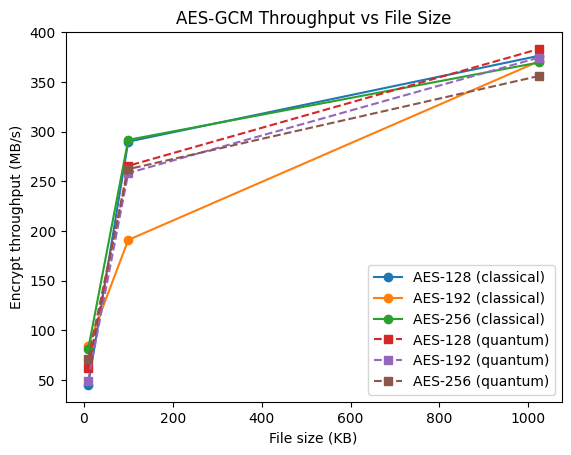

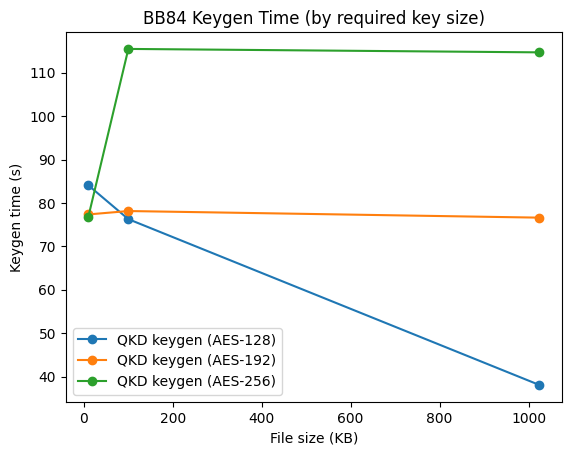

In [50]:
# @title Visualisation Plots

import matplotlib.pyplot as plt

def plot_throughput(df):
    fig = plt.figure()
    for kb in sorted(df.key_bits.unique()):
        d = df[(df.key_bits==kb) & (df.key_source=="classical")]
        plt.plot(d.file_size_B/1024, d.throughput_MBps, marker='o', label=f"AES-{kb} (classical)")
    for kb in sorted(df.key_bits.unique()):
        d = df[(df.key_bits==kb) & (df.key_source=="quantum")]
        plt.plot(d.file_size_B/1024, d.throughput_MBps, marker='s', linestyle='--', label=f"AES-{kb} (quantum)")
    plt.xlabel("File size (KB)")
    plt.ylabel("Encrypt throughput (MB/s)")
    plt.title("AES-GCM Throughput vs File Size")
    plt.legend()
    plt.show()

def plot_keygen_time(df):
    fig = plt.figure()
    d = df[df.key_source=="quantum"]
    if not d.empty:
        for kb in sorted(d.key_bits.unique()):
            dd = d[d.key_bits==kb]
            plt.plot(dd.file_size_B/1024, dd.keygen_time_s, marker='o', label=f"QKD keygen (AES-{kb})")
        plt.xlabel("File size (KB)")
        plt.ylabel("Keygen time (s)")
        plt.title("BB84 Keygen Time (by required key size)")
        plt.legend()
        plt.show()

plot_throughput(df)
plot_keygen_time(df)